In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

###Loading the data

In [5]:
import zipfile

zip_path = "/content/drive/MyDrive/ML-Datasets/SignLanguageMNIST/data.zip"
extract_path = "/content/drive/MyDrive/ML-Datasets/SignLanguageMNIST"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [5]:
TRAIN_DATA = "/content/drive/MyDrive/ML-Datasets/SignLanguageMNIST/train"
VALID_DATA = "/content/drive/MyDrive/ML-Datasets/SignLanguageMNIST/validation"

####See whats in the data

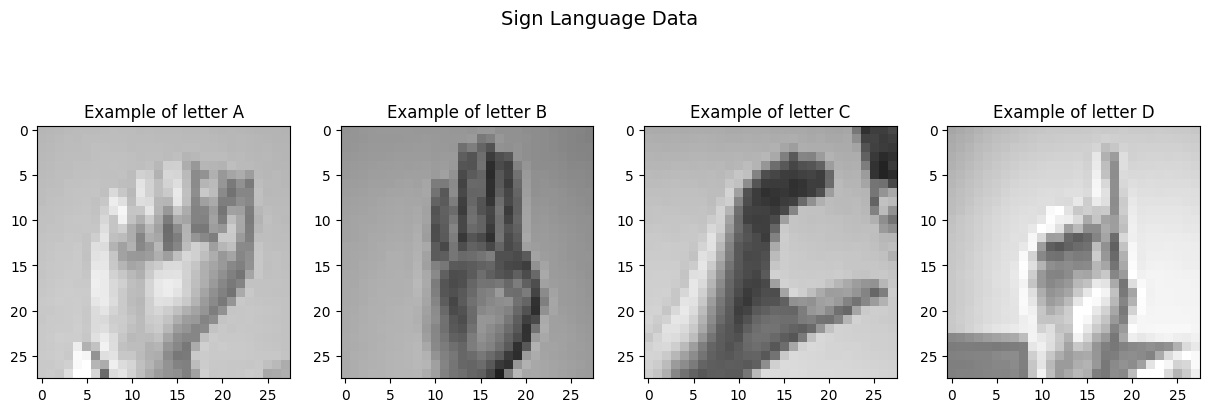

In [6]:
import random

fig, axes = plt.subplots(1, 4, figsize=(15, 5))
fig.suptitle("Sign Language Data", fontsize=14)

for ii, letter in enumerate(['A' , 'B', 'C', 'D']):
  dir = f"/content/drive/MyDrive/ML-Datasets/SignLanguageMNIST/train/{letter}"

  images = os.listdir(dir)
  random_img = random.choice(images)

  img_path = os.path.join(dir, random_img)
  img = tf.keras.preprocessing.image.load_img(img_path)

  axes[ii].imshow(img)
  axes[ii].set_title(f'Example of letter {letter}')

plt.show()

In [7]:
img_np = tf.keras.preprocessing.image.img_to_array(img)
img_np.shape

(28, 28, 3)

###Creating the Train and Test Data

In [8]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    directory = TRAIN_DATA,
    batch_size = 32,
    image_size = (28, 28),
    label_mode = "categorical",
    color_mode = "grayscale",
)

valid_dataset = tf.keras.utils.image_dataset_from_directory(
    directory = VALID_DATA,
    batch_size = 32,
    image_size = (28, 28),
    label_mode = "categorical",
    color_mode = "grayscale",
)

Found 27455 files belonging to 24 classes.
Found 7173 files belonging to 24 classes.


In [9]:
print("Train image shape: ", train_dataset.element_spec[0].shape)
print("Train label shape: ", train_dataset.element_spec[1].shape)
print("Valid image shape: ", valid_dataset.element_spec[0].shape)
print("Valid label shape: ", valid_dataset.element_spec[1].shape)

Train image shape:  (None, 28, 28, 1)
Train label shape:  (None, 24)
Valid image shape:  (None, 28, 28, 1)
Valid label shape:  (None, 24)


###Implementing the Model

In [10]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),

    #Data Augmentation layers
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomTranslation(0.1, 0.1),

    #Rescaling the image pixels
    tf.keras.layers.Rescaling(1. / 255),

    #Convolutions
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),

    tf.keras.layers.Flatten(),

    #Dense Hidden layers
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    #Output layer
    tf.keras.layers.Dense(24, activation='softmax')
])

model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss = "categorical_crossentropy",
              metrics = ['accuracy'])

In [11]:
print("Input shape: ", model.input_shape)
print("Output shape: ", model.output_shape)

model.summary()

Input shape:  (None, 28, 28, 1)
Output shape:  (None, 24)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 28, 28, 1)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom (RandomZoom)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_translation              │ (None, 28, 28, 1)      │             0 │
│ (RandomTranslation)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,424 (431.34 KB)

 Trainable params: 110,424 (431.34 KB)

 Non-trainable params: 0 (0.00 B)

###Eerly stopping callback

In [18]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    if(logs.get('accuracy') > 0.99):
      self.model.stop_training = True
      print("\nReached 99% accuracy so cancelling training!")



###Training the model

In [21]:
history = model.fit(train_dataset,
                    epochs = 25,
                    validation_data = valid_dataset,
                    callbacks=[myCallback()])

Epoch 1/25
858/858 ━━━━━━━━━━━━━━━━━━━━ 148s 172ms/step - accuracy: 0.8569 - loss: 0.4366 - val_accuracy: 0.8558 - val_loss: 0.4619
Epoch 2/25
858/858 ━━━━━━━━━━━━━━━━━━━━ 154s 180ms/step - accuracy: 0.8672 - loss: 0.4224 - val_accuracy: 0.8991 - val_loss: 0.3222
Epoch 3/25
858/858 ━━━━━━━━━━━━━━━━━━━━ 154s 179ms/step - accuracy: 0.8635 - loss: 0.4302 - val_accuracy: 0.9111 - val_loss: 0.2884
Epoch 4/25
858/858 ━━━━━━━━━━━━━━━━━━━━ 145s 169ms/step - accuracy: 0.8683 - loss: 0.4226 - val_accuracy: 0.9177 - val_loss: 0.2872
Epoch 5/25
858/858 ━━━━━━━━━━━━━━━━━━━━ 143s 166ms/step - accuracy: 0.8684 - loss: 0.4033 - val_accuracy: 0.9019 - val_loss: 0.3442
Epoch 6/25
858/858 ━━━━━━━━━━━━━━━━━━━━ 140s 164ms/step - accuracy: 0.8741 - loss: 0.3983 - val_accuracy: 0.8745 - val_loss: 0.4410
Epoch 7/25
858/858 ━━━━━━━━━━━━━━━━━━━━ 140s 163ms/step - accuracy: 0.8764 - loss: 0.3941 - val_accuracy: 0.9013 - val_loss: 0.3113
Epoch 8/25
858/858 ━━━━━━━━━━━━━━━━━━━━ 145s 169ms/step - accuracy: 0.8768 -

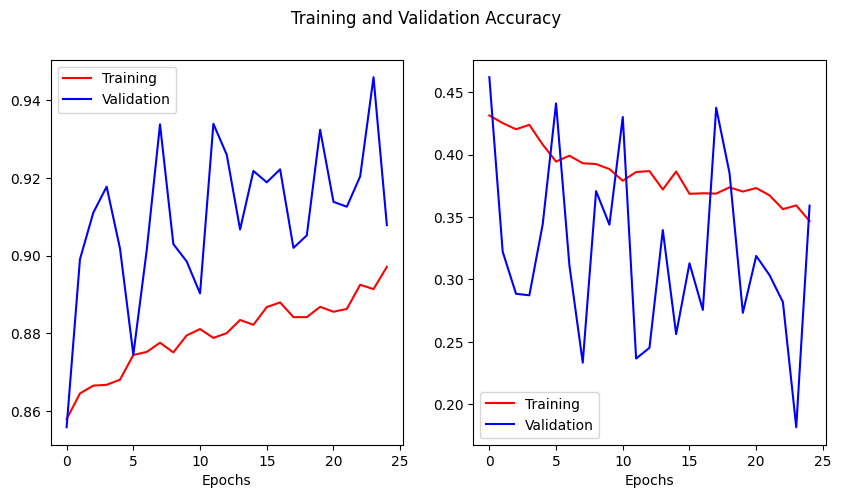

In [22]:
train_acc = history.history['accuracy']
valid_acc = history.history['val_accuracy']

train_loss = history.history['loss']
valid_loss = history.history['val_loss']

epochs = range(len(train_acc))

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Training and Validation Accuracy")

for i, (data, label) in enumerate(zip([(train_acc, valid_acc), (train_loss, valid_loss)], ['Accuracy', 'Loss'])):
  axes[i].plot(epochs, data[0], 'r', label='Training')
  axes[i].plot(epochs, data[1], 'b', label='Validation')
  axes[i].legend()
  axes[i].set_xlabel('Epochs')

plt.show()

###Get Predictions

In [28]:
y_true = []

for _, labels in valid_dataset:
  y_true.extend(labels.numpy())

y_true = np.array(y_true)
y_true = np.argmax(y_true, axis=1)

y_pred_probs = model.predict(valid_dataset)
y_pred = np.argmax(y_pred_probs, axis=1)

225/225 ━━━━━━━━━━━━━━━━━━━━ 27s 119ms/step


###Model Evaluation

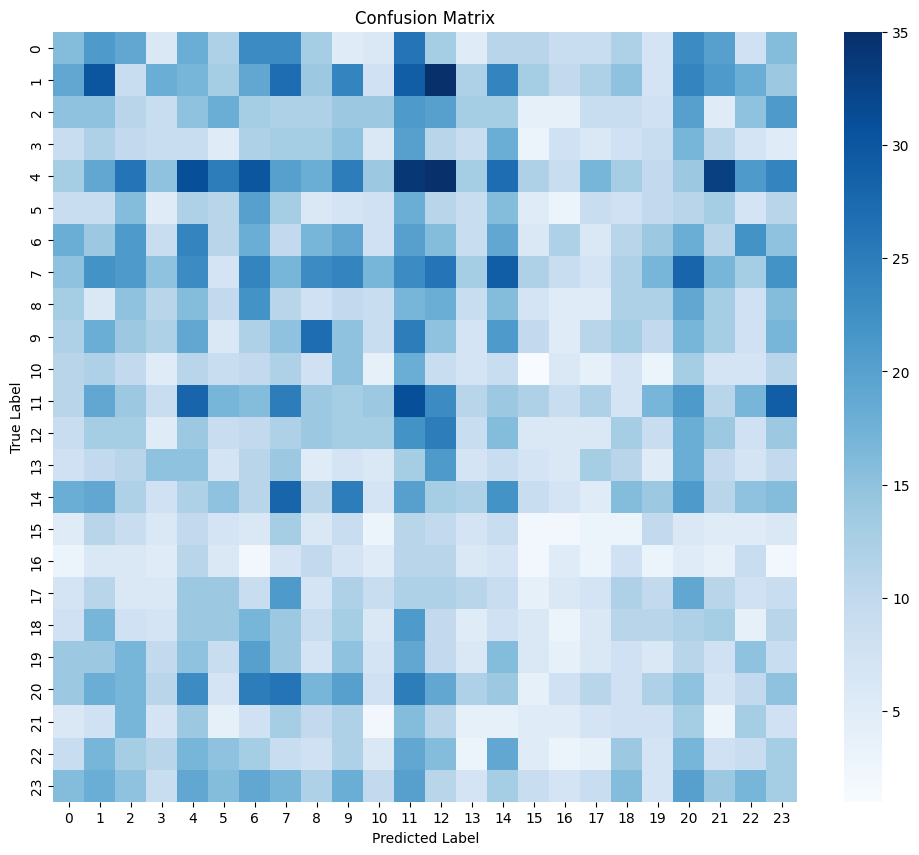

<Figure size 640x480 with 0 Axes>

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, cmap="Blues", xticklabels=range(24), yticklabels=range(24))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [37]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')

print("Precision: ", precision)
print("Recall: ", recall)

Precision:  0.042106524575594106
Recall:  0.04204577842348151


In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.06      0.05      0.05       332
           1       0.08      0.07      0.08       432
           2       0.03      0.04      0.03       310
           3       0.04      0.04      0.04       245
           4       0.08      0.06      0.07       498
           5       0.04      0.04      0.04       247
           6       0.05      0.05      0.05       348
           7       0.04      0.04      0.04       436
           8       0.03      0.03      0.03       288
           9       0.04      0.05      0.04       331
          10       0.02      0.02      0.02       209
          11       0.06      0.08      0.07       394
          12       0.06      0.09      0.07       291
          13       0.03      0.03      0.03       246
          14       0.06      0.06      0.06       347
          15       0.01      0.01      0.01       164
          16       0.03      0.03      0.03       144
          17       0.04    